In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
def convert_to_float(value):
  try:
    return float(value.strip('%'))
  except ValueError:
    return float('NaN')

columns_with_percentage = ['SET', '1AM-GEM', 'KTB.BK', 'PTTEP.BK', 'TTB.BK', 'MEGA.BK','CPALL.BK','CENTEL.BK', 'MINT.BK', 'ADVANC.BK', 'HANA.BK', 'OSP.BK']  # Replace with your column names
for col in columns_with_percentage:
  data[col] = data[col].apply(convert_to_float)

In [4]:
def createRegression(stock):
  X = data['SET'].values.reshape(-1, 1)
  Y = data[stock].values

  model = LinearRegression()

  model.fit(X, Y)

  Y_pred = model.predict(X)

  plt.scatter(X, Y, color='blue', label='Data points')
  plt.plot(X, Y_pred, color='red', label='Regession Analysis')

  plt.xlabel('SET')
  plt.ylabel(stock)
  plt.title(stock)

  plt.legend()

  plt.show()

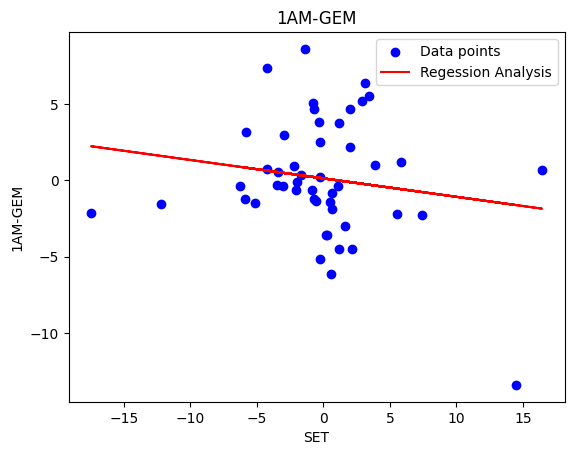

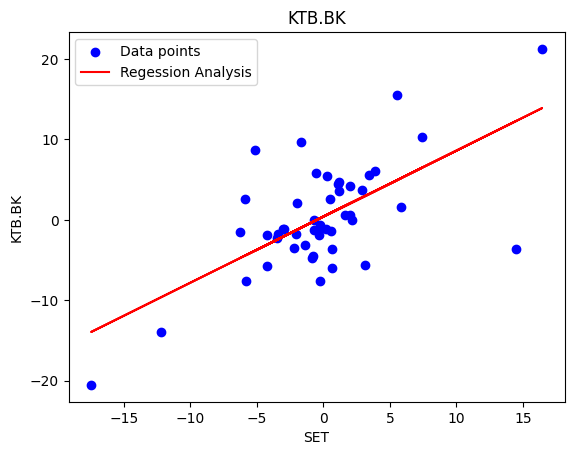

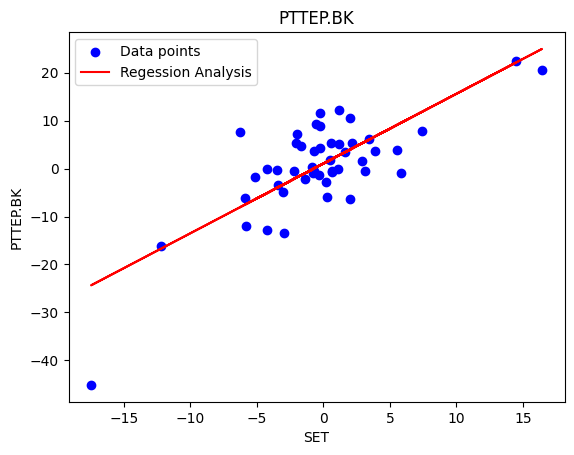

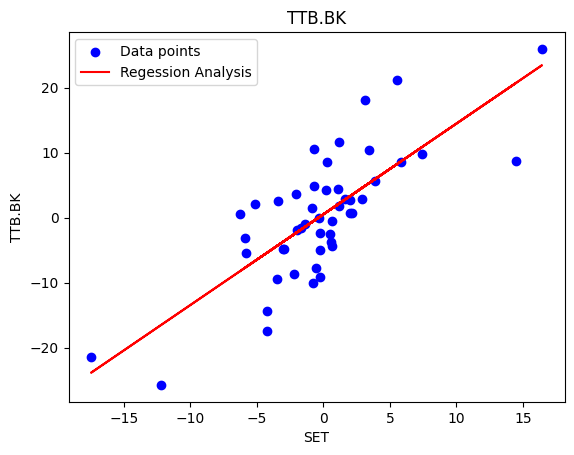

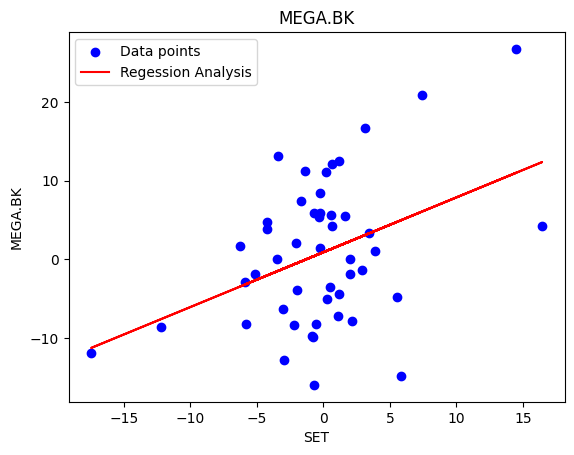

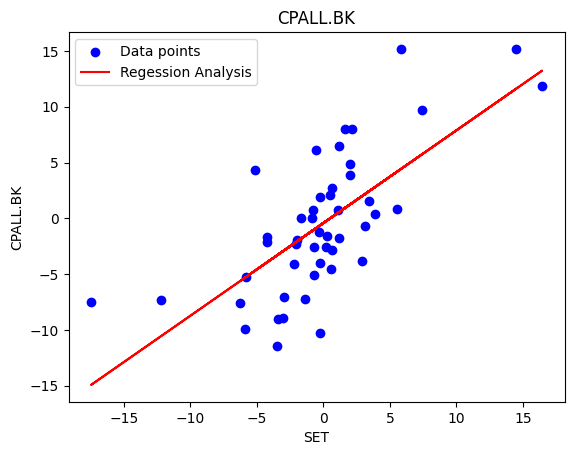

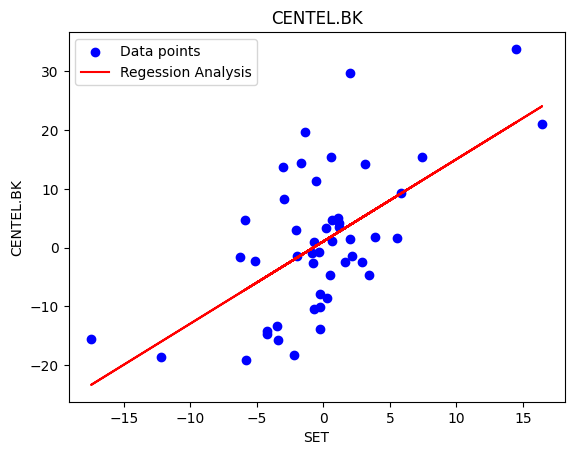

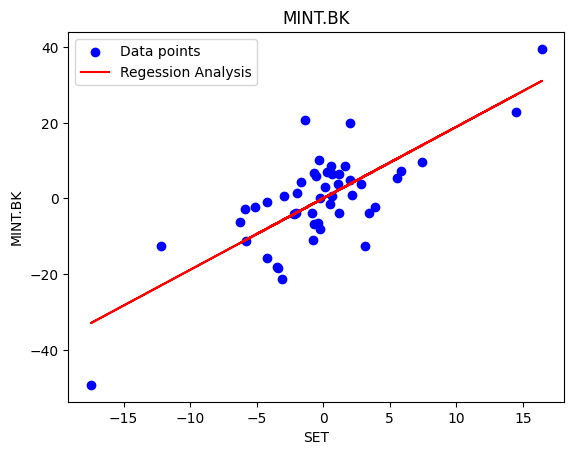

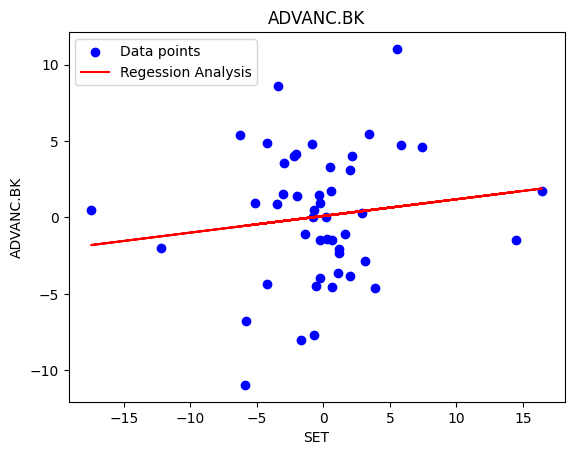

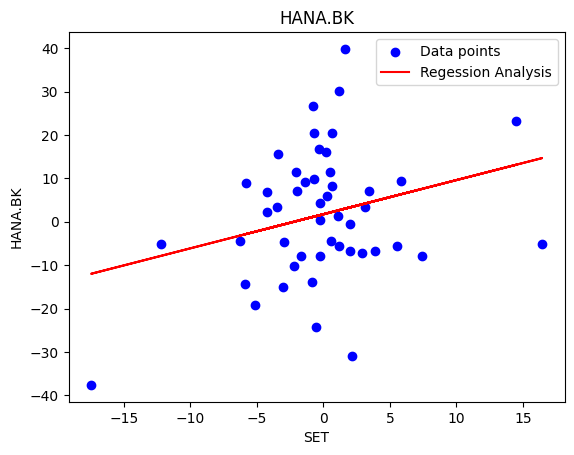

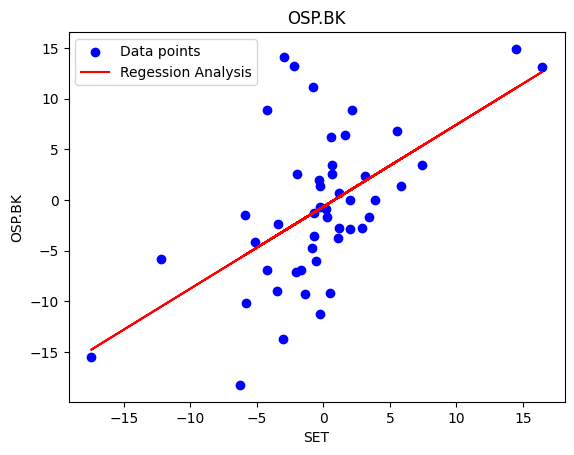

In [5]:
for stock in columns_with_percentage[1::]:
  createRegression(stock)

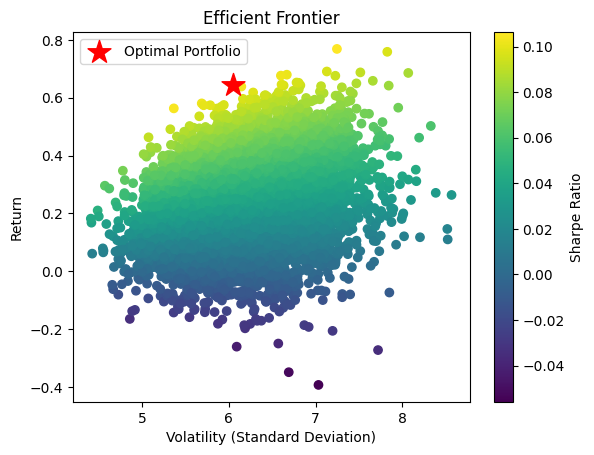

In [6]:
import numpy as np

stocks = ['KTB.BK', 'PTTEP.BK', 'TTB.BK', 'MEGA.BK','CPALL.BK','CENTEL.BK', 'MINT.BK', 'ADVANC.BK', 'HANA.BK', 'OSP.BK']

# for col in stocks:
#   data[col] = data[col].apply(convert_to_float)

stock_returns = data[stocks]

# Calculate mean returns and covariance matrix
mean_returns = stock_returns.mean()
cov_matrix = stock_returns.cov()


# Function to calculate portfolio returns and volatility
def portfolio_performance(weights, mean_returns, cov_matrix):
  portfolio_return = np.sum(mean_returns * weights)
  portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
  return portfolio_return, portfolio_std_dev

# Number of random portfolios to generate
num_portfolios = 10000

# Initialize results
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(stock_returns.columns))
    weights /= np.sum(weights)
    portfolio_return, portfolio_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i] # Sharpe Ratio

# Find portfolios with maximum Sharpe Ratio
max_sharpe_ratio_idx = np.argmax(results[2])
optimal_return = results[0, max_sharpe_ratio_idx]
optimal_std_dev = results[1, max_sharpe_ratio_idx]

# Plotting the efficient frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.scatter(optimal_std_dev, optimal_return, marker='*', color='r', s=300, label='Optimal Portfolio')
plt.legend()
plt.show()

In [7]:
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_datareader as web
import datetime
# not needed, only to prettify the plots.
import matplotlib
from IPython.display import set_matplotlib_formats

ind = pd.read_csv("https://raw.githubusercontent.com/nutdnuy/Portfolio_optimization_with_Python/master/data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

def annualize_rets(r, periods_per_year):
  compounded_growth = (1+r).prod()
  n_periods = r.shape[0]
  return compounded_growth**(periods_per_year/n_periods)-1

er = annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

def portfolio_return(weights, returns):
  return weights.T @ returns

def portfolio_vol(weights, covmat):
  return (weights.T @ covmat @ weights)**0.5
  vols = [portfolio_vol(w, cov.loc[l,l]) for w in weights]
  ef = pd.DataFrame({"R": rets, "V": vols})